In [ ]:
%reset -f
import json
import pandas as pd, numpy as np
from matplotlib import pyplot as plt
import sys
sys.path.append('/home/seyedkazemi/USEFUL_DATA_CODE/codes/mskhelper/')
sys.path.append('/home/seyedkazemi/USEFUL_DATA_CODE/codes/Marconi100/DNN/')
import mohsenutils

# ----------------------------------------------------------------------------------



# def error_location_AEandflgas(ae_error_location_txt_pth, falgs_csv_pth, timestamp, ae_recon_error_prec=0.1):
    
#     with open(ae_error_location_txt_pth) as text:
#         txt = text.read()

#     txt = txt.replace("\'", "\"")
#     Error_location = json.loads(txt)

#     keys_rng = pd.to_datetime(list(Error_location.keys()))
#     keys_rng = keys_rng.sort_values()



   
#     error_location_ae_dt = pd.DataFrame.from_dict(Error_location[str(timestamp)], orient='index', columns=['Error_of_Reconstruction'])
#     error_location_ae_dt = error_location_ae_dt.query('Error_of_Reconstruction>@ae_recon_error_prec')
#     error_location_ae = set([i.split('_pst_1')[0] for i in list(error_location_ae_dt.index) ])

#     # 1 means 100% error in reconstruction
#     print('Autoencoder',25*'++')
#     print('1 means 100% error in reconstruction')
#     print(f'Number of the sensors with more than {ae_recon_error_prec}% AE reconstruction error : {len(error_location_ae)} out of 242')

    
#     # Flags:
#     kwargs = {'parse_dates':True, 'date_parser':pd.to_datetime, 'index_col':'timestamp'}
#     flags99 = pd.read_csv(falgs_csv_pth,**kwargs)
#     flags_error_location_dt = flags99.loc[timestamp,:]
#     flags_error_location_dt = flags_error_location_dt[flags_error_location_dt>0]

#     flags_error_location = set(flags_error_location_dt.index.values)
#     print(f'Number of the sensors with raised flgas {len(flags_error_location)} out of 281')
#     error_location_ae_dt.index.name='parameters'
#     flags_error_location_dt.name='flags_value' 
    
#     flags_error_location_dt = pd.DataFrame(flags_error_location_dt)
#     flags_error_location_dt.index.name='flags' 
    
#     error_location_ae = pd.DataFrame(error_location_ae,columns=['parameters']) 
#     flags_error_location = pd.DataFrame(flags_error_location, columns=['flags'])
    
    
#     lpt_AE = pd.read_csv('/home/seyedkazemi/USEFUL_DATA_CODE/codes/Marconi100/Results_Analysis/csv_files/LookupTabel_AE.csv', index_col='Index')
#     lpt_flags = pd.read_csv('/home/seyedkazemi/USEFUL_DATA_CODE/codes/Marconi100/Results_Analysis/csv_files/LookupTabel_Flags.csv', index_col='Index')
    
#     error_location_ae['Err_Location'] = error_location_ae[['parameters']].applymap(lambda param : lpt_AE[lpt_AE['dataframe_parameters']==param].Type.values[0])
#     flags_error_location['Err_Location'] = flags_error_location[['flags']].applymap(lambda flg : lpt_flags[lpt_flags['Flags']==flg].Type.values[0])
    
    
    
#     erl_ae =  pd.DataFrame(error_location_ae.Err_Location.value_counts())
#     erl_ae.rename(columns={'Err_Location':'num_Err_Location_AE'}, inplace=True)
#     erl_ae.index.name =  'Err_Location'

#     erl_flags =  pd.DataFrame(flags_error_location.Err_Location.value_counts())
#     erl_flags.rename(columns={'Err_Location':'num_Err_Location_flags'}, inplace=True)
#     erl_flags.index.name =  'Err_Location'

    
    
#     max_lpt_flags = pd.DataFrame(lpt_flags.Type.value_counts())
#     max_lpt_flags.index.name = 'Err_Location'
#     max_lpt_flags.rename(columns={'Type':'Type_max_flags'}, inplace=True)
#     max_lpt_flags.reset_index(inplace=True)

#     max_lpt_AE = pd.DataFrame(lpt_AE.Type.value_counts())
#     max_lpt_AE.index.name = 'Err_Location'
#     max_lpt_AE.rename(columns={'Type':'Type_max_AE'}, inplace=True)
#     max_lpt_AE.reset_index(inplace=True)
    
    
#     erl_ae = pd.merge(pd.merge(max_lpt_AE, max_lpt_flags, on='Err_Location',how='outer')
#              , erl_ae, on='Err_Location',how='outer')
    
#     erl_ae_flags = pd.merge(erl_ae, erl_flags, on='Err_Location',how='outer')

#     erl_ae_flags = erl_ae_flags.fillna(0)
#     erl_ae_flags['%AE'] = erl_ae_flags['num_Err_Location_AE']/erl_ae_flags['Type_max_AE']
#     erl_ae_flags['%flags'] = erl_ae_flags['num_Err_Location_flags']/erl_ae_flags['Type_max_flags']
    
#     return erl_ae_flags, error_location_ae, flags_error_location,  error_location_ae_dt, flags_error_location_dt




import json
import pandas as pd
import numpy as np

def error_location_AEandflgas(ae_error_location_txt_pth, falgs_csv_pth, timestamp, ae_recon_error_prec=0.1):
    # --- Load AE error-location JSON ---
    with open(ae_error_location_txt_pth) as text:
        txt = text.read()
    txt = txt.replace("'", '"')  # ensure valid JSON
    Error_location = json.loads(txt)

    # AE error locations at the given timestamp
    error_location_ae_dt = pd.DataFrame.from_dict(
        Error_location[str(timestamp)],
        orient='index',
        columns=['Error_of_Reconstruction']
    )
    error_location_ae_dt = error_location_ae_dt.query('Error_of_Reconstruction > @ae_recon_error_prec')
    error_location_ae = set([i.split('_pst_1')[0] for i in error_location_ae_dt.index])

    # Pretty prints
    print('Autoencoder', '++' * 25)
    print('1 means 100% error in reconstruction')
    print(f'Number of the sensors with more than {ae_recon_error_prec}% AE reconstruction error : {len(error_location_ae)} out of 242')

    # --- Load flags CSV and select raised flags at timestamp ---
    kwargs = {'parse_dates': True, 'date_parser': pd.to_datetime, 'index_col': 'timestamp'}
    flags99 = pd.read_csv(falgs_csv_pth, **kwargs)
    flags_error_location_dt = flags99.loc[timestamp, :]
    flags_error_location_dt = flags_error_location_dt[flags_error_location_dt > 0]

    flags_error_location = set(flags_error_location_dt.index.values)
    print(f'Number of the sensors with raised flgas {len(flags_error_location)} out of 281')

    # Tidy indices for later merges
    error_location_ae_dt.index.name = 'parameters'
    flags_error_location_dt.name = 'flags_value'
    flags_error_location_dt = pd.DataFrame(flags_error_location_dt)
    flags_error_location_dt.index.name = 'flags'

    error_location_ae = pd.DataFrame(error_location_ae, columns=['parameters'])
    flags_error_location = pd.DataFrame(flags_error_location, columns=['flags'])

    # --- Lookup tables ---
    lpt_AE = pd.read_csv(
        '/home/seyedkazemi/USEFUL_DATA_CODE/codes/Marconi100/Results_Analysis/csv_files/LookupTabel_AE.csv',
        index_col='Index'
    )
    lpt_flags = pd.read_csv(
        '/home/seyedkazemi/USEFUL_DATA_CODE/codes/Marconi100/Results_Analysis/csv_files/LookupTabel_Flags.csv',
        index_col='Index'
    )

    # Map parameters/flags -> Err_Location using merges (safer than .apply/.values[0])
    error_location_ae = error_location_ae.merge(
        lpt_AE[['dataframe_parameters', 'Type']],
        left_on='parameters', right_on='dataframe_parameters', how='left'
    )
    error_location_ae = error_location_ae.rename(columns={'Type': 'Err_Location'})[['Err_Location']].dropna()

    flags_error_location = flags_error_location.merge(
        lpt_flags[['Flags', 'Type']],
        left_on='flags', right_on='Flags', how='left'
    )
    flags_error_location = flags_error_location.rename(columns={'Type': 'Err_Location'})[['Err_Location']].dropna()

    # --- Counts per Err_Location with explicit names and guaranteed column ---
    erl_ae = (
        error_location_ae['Err_Location']
        .value_counts()
        .rename_axis('Err_Location')
        .reset_index(name='num_Err_Location_AE')
    )

    erl_flags = (
        flags_error_location['Err_Location']
        .value_counts()
        .rename_axis('Err_Location')
        .reset_index(name='num_Err_Location_flags')
    )

    # --- Max counts per Err_Location from lookup tables ---
    max_lpt_AE = (
        lpt_AE['Type']
        .value_counts()
        .rename_axis('Err_Location')
        .reset_index(name='Type_max_AE')
    )

    max_lpt_flags = (
        lpt_flags['Type']
        .value_counts()
        .rename_axis('Err_Location')
        .reset_index(name='Type_max_flags')
    )

    # --- Merge step-by-step with clean keys and unique columns ---
    base = pd.merge(max_lpt_AE, max_lpt_flags, on='Err_Location', how='outer')
    base = pd.merge(base, erl_ae, on='Err_Location', how='outer')
    erl_ae_flags = pd.merge(base, erl_flags, on='Err_Location', how='outer')

    # Fill NaNs, compute percentages safely
    erl_ae_flags = erl_ae_flags.fillna(0)

    # Avoid zero-division: set ratio to 0 when denominator is 0
    denom_ae = erl_ae_flags['Type_max_AE'].replace(0, np.nan)
    denom_flags = erl_ae_flags['Type_max_flags'].replace(0, np.nan)

    erl_ae_flags['%AE'] = (erl_ae_flags['num_Err_Location_AE'] / denom_ae).fillna(0)
    erl_ae_flags['%flags'] = (erl_ae_flags['num_Err_Location_flags'] / denom_flags).fillna(0)

    return erl_ae_flags, error_location_ae, flags_error_location, error_location_ae_dt, flags_error_location_dt



# ----------------------------------------------------------------------------------

# Zone 1: '2021-07-27 11:00:00'
# Zone 2: '2021-07-28 08:20:00'
# Thermal Hazard : '2021-07-28 18:00:00'

# idx = '2021-07-27 10:50:00'
# idx = '2021-07-28 08:20:00'
# idx = '2021-07-28 18:00:00'

idx_1 = '2021-07-27 10:50:00'
idx_2 = '2021-07-28 08:20:00'
idx_3 = '2021-07-28 17:50:00'

ae_recon_error_prec = 3.7338207200826443

erl_ae_flags_1, error_location_ae, flags_error_location,  error_location_ae_dt, flags_error_location_dt = error_location_AEandflgas(
    ae_error_location_txt_pth='/scratch/seyedkazemi/Marconi100-Cooked/AE/LSTM-AE-5-Month/LSTM-AE_Results_SqL2-ftur242grey_data_range_01_25-f10/Train_2021-04-08_to_2021-07-27/Error_Location/Error_location_Inference_to_2021_08_17_23_50_Error_Threshold850_Rreconstruction_Error_Perc0_L1loss.txt',
    falgs_csv_pth='/scratch/seyedkazemi/Marconi100-Cooked/flags9901_2021_08_01_23_50.csv',
    timestamp=idx_1, 
    ae_recon_error_prec=ae_recon_error_prec)


#display(erl_ae_flags_1, error_location_ae, flags_error_location,  error_location_ae_dt, flags_error_location_dt)


erl_ae_flags_2, _, _,  _, _ = error_location_AEandflgas(
    ae_error_location_txt_pth='/scratch/seyedkazemi/Marconi100-Cooked/AE/LSTM-AE-5-Month/LSTM-AE_Results_SqL2-ftur242grey_data_range_01_25-f10/Train_2021-04-08_to_2021-07-27/Error_Location/Error_location_Inference_to_2021_08_17_23_50_Error_Threshold850_Rreconstruction_Error_Perc0_L1loss.txt',
    falgs_csv_pth='/scratch/seyedkazemi/Marconi100-Cooked/flags9901_2021_08_01_23_50.csv',
    timestamp=idx_2, 
    ae_recon_error_prec=ae_recon_error_prec)

erl_ae_flags_3, _, _,  _, _ = error_location_AEandflgas(
    ae_error_location_txt_pth='/scratch/seyedkazemi/Marconi100-Cooked/AE/LSTM-AE-5-Month/LSTM-AE_Results_SqL2-ftur242grey_data_range_01_25-f10/Train_2021-04-08_to_2021-07-27/Error_Location/Error_location_Inference_to_2021_08_17_23_50_Error_Threshold850_Rreconstruction_Error_Perc0_L1loss.txt',
    falgs_csv_pth='/scratch/seyedkazemi/Marconi100-Cooked/flags9901_2021_08_01_23_50.csv',
    timestamp=idx_3, 
    ae_recon_error_prec=ae_recon_error_prec)

erl_ae_flags_1.set_index('Err_Location', inplace=True) 
erl_ae_flags_2.set_index('Err_Location', inplace=True)
erl_ae_flags_3.set_index('Err_Location', inplace=True)

erl_ae_flags_1.columns = erl_ae_flags_1.columns+'_A'
erl_ae_flags_2.columns = erl_ae_flags_2.columns+'_B'
erl_ae_flags_3.columns = erl_ae_flags_3.columns+'_C'

erl_ae_flags_3

df = mohsenutils.mrg(None,'outer',
            erl_ae_flags_1, 
            erl_ae_flags_2,
            erl_ae_flags_3)

# Weighted Average ############

df2 = pd.DataFrame(df.sum()).T

df2['%AE_sum_A'] = df2['num_Err_Location_AE_A']/df2['Type_max_AE_A']
# df2['%flags_sum_A'] = df2['num_Err_Location_flags_A']/281  
df2['%flags_sum_A'] = df2['num_Err_Location_flags_A']/df2['Type_max_flags_A']  


df2['%AE_sum_B'] = df2['num_Err_Location_AE_B']/df2['Type_max_AE_B']
# df2['%flags_sum_B'] = df2['num_Err_Location_flags_B']/281  
df2['%flags_sum_B'] = df2['num_Err_Location_flags_B']/df2['Type_max_flags_B']  


df2['%AE_sum_C'] = df2['num_Err_Location_AE_C']/df2['Type_max_AE_C']
# df2['%flags_sum_C'] = df2['num_Err_Location_flags_C']/281
df2['%flags_sum_C'] = df2['num_Err_Location_flags_C']/df2['Type_max_flags_C']  

################################


def fun_and(row, col_AE, col_flags, th):
    if row[col_AE] >= th:
        AE = True
    else:
        AE = False

    if row[col_flags] >= th:
        flags = True
    else:
        flags = False
        
    return AE and flags


def fun_or(row, col_AE, col_flags, th):
    if row[col_AE] >= th:
        AE = True
    else:
        AE = False

    if row[col_flags] >= th:
        flags = True
    else:
        flags = False
        
    return AE or flags

th = 0.5

df['Aand'] = df.apply(fun_and, args=['%AE_A','%flags_A', th], axis=1)
df['Band'] = df.apply(fun_and, args=['%AE_B','%flags_B', th], axis=1)
df['Cand'] = df.apply(fun_and, args=['%AE_C','%flags_C', th], axis=1)

                


df['Type_max_AE_flags'] = df['Type_max_AE_A'] + df['Type_max_flags_A']

df['num_Err_Location_AE_flags_A'] = df['num_Err_Location_AE_A'] + df['num_Err_Location_flags_A']
df['num_Err_Location_AE_flags_B'] = df['num_Err_Location_AE_B'] + df['num_Err_Location_flags_B']
df['num_Err_Location_AE_flags_C'] = df['num_Err_Location_AE_C'] + df['num_Err_Location_flags_C']

df['%AE_flags_A'] = df['num_Err_Location_AE_flags_A']/df['Type_max_AE_flags']
df['%AE_flags_B'] = df['num_Err_Location_AE_flags_B']/df['Type_max_AE_flags']
df['%AE_flags_C'] = df['num_Err_Location_AE_flags_C']/df['Type_max_AE_flags']

df

df.drop('Delta_Water_Temp', inplace=True)

df.to_csv('Error_Location_AE_and_flags_3_event_2021-07-27_to_2021-07-28.csv')
df

Autoencoder ++++++++++++++++++++++++++++++++++++++++++++++++++
1 means 100% error in reconstruction
Number of the sensors with more than 3.7338207200826443% AE reconstruction error : 73 out of 242


/tmp/ipykernel_679546/3618041299.py:126: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  flags99 = pd.read_csv(falgs_csv_pth, **kwargs)


Number of the sensors with raised flgas 37 out of 281
Autoencoder ++++++++++++++++++++++++++++++++++++++++++++++++++
1 means 100% error in reconstruction
Number of the sensors with more than 3.7338207200826443% AE reconstruction error : 25 out of 242


/tmp/ipykernel_679546/3618041299.py:126: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  flags99 = pd.read_csv(falgs_csv_pth, **kwargs)


Number of the sensors with raised flgas 46 out of 281
Autoencoder ++++++++++++++++++++++++++++++++++++++++++++++++++
1 means 100% error in reconstruction
Number of the sensors with more than 3.7338207200826443% AE reconstruction error : 204 out of 242


/tmp/ipykernel_679546/3618041299.py:126: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  flags99 = pd.read_csv(falgs_csv_pth, **kwargs)


Number of the sensors with raised flgas 92 out of 281


,Type_max_AE_A,Type_max_flags_A,num_Err_Location_AE_A,num_Err_Location_flags_A,%AE_A,%flags_A,Type_max_AE_B,Type_max_flags_B,num_Err_Location_AE_B,num_Err_Location_flags_B,...,Aand,Band,Cand,Type_max_AE_flags,num_Err_Location_AE_flags_A,num_Err_Location_AE_flags_B,num_Err_Location_AE_flags_C,%AE_flags_A,%AE_flags_B,%AE_flags_C
Err_Location,,,,,,,,,,,,,,,,,,,,,
GPU_Temp,80,12.0,33.0,8.0,0.412500,0.666667,80,12.0,8.0,3.0,...,False,False,True,92.0,41.0,11.0,80.0,0.445652,0.119565,0.869565
CPU_Temp,40,12.0,16.0,6.0,0.400000,0.500000,40,12.0,1.0,2.0,...,False,False,True,52.0,22.0,3.0,43.0,0.423077,0.057692,0.826923
Inlet_Node_Temp,20,9.0,0.0,0.0,0.000000,0.000000,20,9.0,4.0,2.0,...,False,False,True,29.0,0.0,6.0,26.0,0.000000,0.206897,0.896552
Fan_Speed_Node,20,9.0,3.0,4.0,0.150000,0.444444,20,9.0,0.0,0.0,...,False,False,True,29.0,7.0,0.0,26.0,0.241379,0.000000,0.896552
Node_Power_Consumption,20,13.0,9.0,7.0,0.450000,0.538462,20,13.0,0.0,1.0,...,False,False,False,33.0,16.0,1.0,19.0,0.484848,0.030303,0.575758
PCIe_Temp,20,9.0,8.0,6.0,0.400000,0.666667,20,9.0,0.0,0.0,...,False,False,True,29.0,14.0,0.0,25.0,0.482759,0.000000,0.862069
CRAC_Supply_Air_Temperature,6,37.0,0.0,0.0,0.000000,0.000000,6,37.0,2.0,0.0,...,False,False,False,43.0,0.0,2.0,4.0,0.000000,0.046512,0.093023
Compressor_Utilization,6,37.0,1.0,0.0,0.166667,0.000000,6,37.0,3.0,9.0,...,False,False,False,43.0,1.0,12.0,11.0,0.023256,0.279070,0.255814
Fan_Speed_CRAC,6,37.0,0.0,2.0,0.000000,0.054054,6,37.0,2.0,12.0,...,False,False,False,43.0,2.0,14.0,12.0,0.046512,0.325581,0.279070


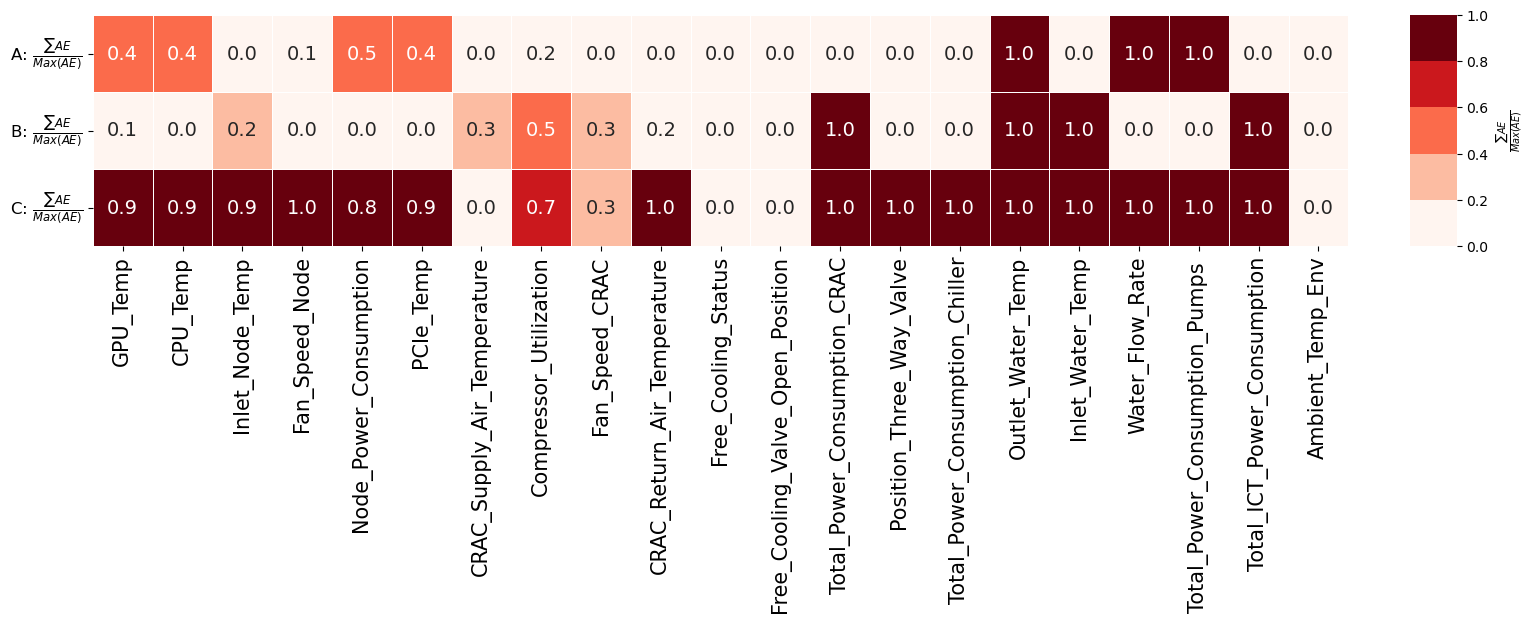

In [11]:
%reset -f
import pandas as pd


df = pd.read_csv('Error_Location_AE_and_flags_3_event_2021-07-27_to_2021-07-28.csv', index_col='Err_Location')




import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import BoundaryNorm
from matplotlib import cm

fig, ax = plt.subplots(1,1,figsize=(20, 3))

# Define discrete colormap with fixed intervals
bounds = np.linspace(0, 1, 6)   # [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
norm = BoundaryNorm(bounds, ncolors=cm.Reds.N, clip=True)

p1 = sns.heatmap(
    df[['%AE_A','%AE_B','%AE_C']].T,
    cbar=True,
    cmap=cm.Reds,
    norm=norm,
    linewidths=0.5,
    annot=True,
    ax=ax,
    vmax=1,
    vmin=0,
    annot_kws={'size':14},
    fmt='.1f',
    cbar_kws={
        "shrink":1,
        "pad":0.04,
        "aspect":5,
        "label": r"$\frac{\sum{AE}}{Max(AE)}$"   # Colorbar label
    }
)

p1.set(xlabel=None)
ax.tick_params(axis='x', rotation=90, labelsize=15)

fontsize_1 = 12
rotation = 0
ax.set_yticklabels([
    r'A: $\frac{\sum{AE}}{Max(AE)}$',
    r'B: $\frac{\sum{AE}}{Max(AE)}$',
    r'C: $\frac{\sum{AE}}{Max(AE)}$'
], fontsize=fontsize_1, rotation=rotation)

plt.subplots_adjust(wspace=0.05, hspace=0.15)
plt.savefig('Heatmap_paper.pdf', bbox_inches='tight', pad_inches=0.2, dpi=200)
